In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d , reconstruct_from_patches_2d
from skimage import color,io

In [6]:
color.img=io.imread("C:\\Users\\Rahul Dusad\\Desktop\\cr7.jpg")

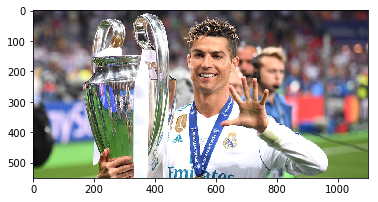

In [32]:
import matplotlib.pyplot as plt
plt.imshow(color.img,cmap=plt.cm.gray)
plt.show()

In [33]:
img=color.rgb2gray(color.img)

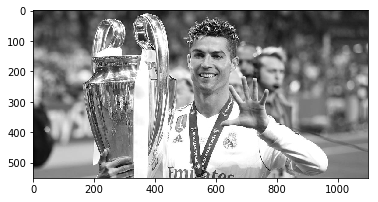

In [34]:
plt.imshow(img,cmap=plt.cm.gray)
plt.show()

In [35]:
img.shape

(550, 1100)

In [36]:
height,width=img.shape

In [37]:
distorted_img=img.copy()
distorted_img

array([[0.21554196, 0.22060235, 0.22452392, ..., 0.10111961, 0.10420784,
        0.10812941],
       [0.21946353, 0.22060235, 0.22452392, ..., 0.10111961, 0.10504118,
        0.10420784],
       [0.22060235, 0.22060235, 0.22369059, ..., 0.10390235, 0.10504118,
        0.10504118],
       ...,
       [0.51178941, 0.51178941, 0.51571098, ..., 0.44428078, 0.44035922,
        0.44035922],
       [0.51178941, 0.51178941, 0.51571098, ..., 0.44035922, 0.44035922,
        0.43643765],
       [0.51178941, 0.51178941, 0.51571098, ..., 0.44035922, 0.43643765,
        0.43643765]])

In [38]:
distortion=0.075*np.random.randn(height,width//2)
distortion.shape

(550, 550)

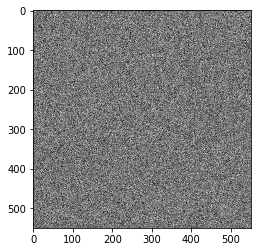

In [39]:
plt.imshow(distortion,cmap='gray')
plt.show()

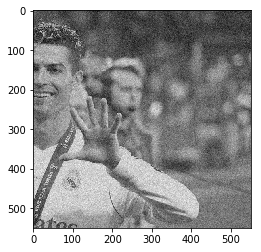

In [40]:
distorted_img[:,width//2:]+=distortion
plt.imshow(distorted_img[:,width//2:],cmap=plt.cm.gray)
plt.show()

In [41]:
patch_size=(7,7)
data=extract_patches_2d(distorted_img[:,:width//2],patch_size)
data.shape

(295936, 7, 7)

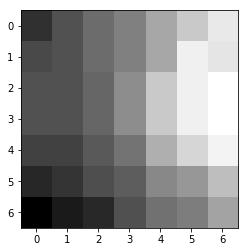

In [42]:
plt.imshow(data[0],cmap=plt.cm.gray)
plt.show()

In [43]:
data=data.reshape(data.shape[0],-1)
data.shape

(295936, 49)

In [44]:
d_learning=MiniBatchDictionaryLearning(n_components=100,alpha=1,n_iter=1000)
components=d_learning.fit(data).components_
components

array([[ 0.11059329,  0.11120994,  0.12512951, ...,  0.15478289,
         0.16498747,  0.16563237],
       [ 0.14044419,  0.14519709,  0.15172005, ...,  0.14766486,
         0.13833584,  0.12299163],
       [-0.1538525 , -0.15482829, -0.15468265, ..., -0.13032833,
        -0.13059601, -0.13197041],
       ...,
       [ 0.07393425, -0.0181275 ,  0.14024286, ...,  0.18669273,
         0.22781723, -0.15376618],
       [ 0.16560823, -0.03742199, -0.08962195, ...,  0.2014736 ,
        -0.03905425,  0.25576265],
       [ 0.10375945,  0.14110099, -0.14886475, ...,  0.13334043,
         0.13998495, -0.32843117]])

In [45]:
components.shape

(100, 49)

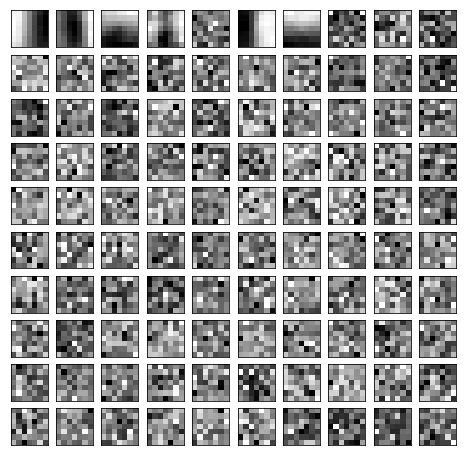

In [47]:
plt.figure(figsize=(8,8))

for i,comp in enumerate(components):
    plt.subplot(10,10,i+1)
    plt.imshow(comp.reshape(patch_size),cmap=plt.cm.gray_r,interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [48]:
right_data=extract_patches_2d(distorted_img[:,width//2:],patch_size)
right_data=right_data.reshape(right_data.shape[0],-1)
right_data.shape

(295936, 49)

In [52]:
d_learning.set_params(transform_n_nonzero_coefs=1,transform_algorithm='lars')
code=d_learning.transform(right_data)
print("shape of codes : ",code.shape)
print("shape of compenents : ",components.shape)

shape of codes :  (295936, 100)
shape of compenents :  (100, 49)


In [53]:
patches=np.dot(code,components)
patches.shape


(295936, 49)

In [57]:
patches=patches.reshape(len(right_data),*patch_size)
patches.shape

(295936, 7, 7)

In [58]:
reconstructed_img=img.copy()
reconstructed_img[:,width//2:]= reconstruct_from_patches_2d(patches,(height,width//2))


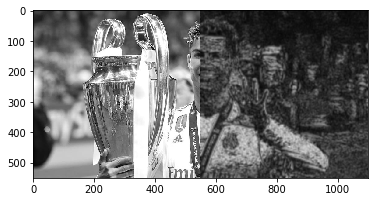

In [59]:
plt.imshow(reconstructed_img,vmin=0,vmax=1,cmap=plt.cm.gray,interpolation='nearest')
plt.show()

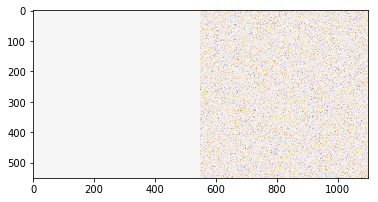

In [62]:
difference=img-distorted_img
plt.imshow(difference,vmin=-0.5,vmax=0.5,cmap=plt.cm.PuOr,interpolation='nearest')
plt.show()

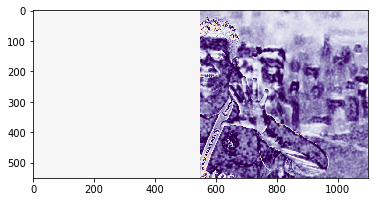

In [63]:
difference=img-reconstructed_img
plt.imshow(difference,vmin=-0.5,vmax=0.5,cmap=plt.cm.PuOr,interpolation='nearest')
plt.show()